In [1]:
import os

import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./preprocessed_apartment.csv')
df.head()

,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
0,8,1,1156,1504,196.21,450000.0,13.0,211.23,1976.06,480.0,120.0,7582.0,7043.0,2018,12
1,8,1,1706,4942,202.58,450000.0,5.0,252.31,2010.07,19.0,1.0,7343.0,5896.0,2018,12
2,8,1,1156,9746,139.83,320000.0,7.0,165.29,1982.04,1924.0,168.0,7565.0,6400.0,2018,12
3,8,1,393,15322,191.04,315000.0,2.0,219.22,1983.12,1204.0,84.0,5451.0,4750.0,2018,12
4,8,1,1156,1509,144.20,304000.0,10.0,158.68,1979.05,560.0,168.0,6969.0,6333.0,2018,12


In [3]:
df.shape

(6174900, 15)

In [4]:
df = df.sample(n=150000)
print(df.shape)
df.head()

(150000, 15)


,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
5262797,11,47,307,8539,101.02,27400.0,9.0,128.93,2000.03,1517.0,70.0,897.0,703.0,2007,8
3935693,5,89,277,7135,65.02,11500.0,3.0,89.26,1979.11,503.0,235.0,585.0,426.0,2011,3
2481726,1,160,655,15386,49.69,7350.0,8.0,62.81,2000.11,476.0,161.0,489.0,387.0,2012,9
2081963,1,118,135,4210,100.52,71750.0,7.0,126.89,2012.03,711.0,195.0,2360.0,1869.0,2017,2
772629,8,103,1102,12572,84.90,109000.0,19.0,109.62,2008.08,6864.0,1978.0,4244.0,3287.0,2017,6


In [5]:
y = df['price']
del df['price']

In [6]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

* layer 14 / 140 / 35 / 5 / 1 [relu]
* opt = adam,epoch = 10, batch = 1000

In [7]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 63000 samples, validate on 42000 samples
Epoch 1/10
63000/63000 [==============================] - 2s 39us/step - loss: 633218729.1429 - acc: 1.5873e-05 - val_loss: 359525676.9524 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 359525676.95238, saving model to ./model/01-359525676.9524.hdf5
Epoch 2/10
63000/63000 [==============================] - 1s 9us/step - loss: 223464958.9841 - acc: 6.3492e-05 - val_loss: 146468301.7143 - val_acc: 7.1429e-05

Epoch 00002: val_loss improved from 359525676.95238 to 146468301.71429, saving model to ./model/02-146468301.7143.hdf5
Epoch 3/10
63000/63000 [==============================] - 1s 9us/step - loss: 119471790.3492 - acc: 6.3492e-05 - val_loss: 118256669.7143 - val_acc: 1.1905e-04

Epoch 00003: val_loss improved from 146468301.71429 to 118256669.71429, saving model to ./model/03-118256669.7143.hdf5
E

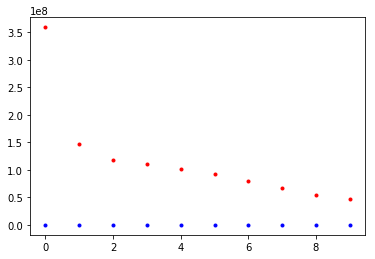

time:  10.0303


6179.2641362775685

In [8]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.4, 
                    epochs=10, 
                    batch_size=1000, 
                    callbacks=[checkpointer])

y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

* layer 14 / 1400 / 2800 / 1024 / 512 / 256 / 64 / 8 / 1 [relu]
* opt = adam,epoch = 10, batch = 1000

Train on 63000 samples, validate on 42000 samples
Epoch 1/10
63000/63000 [==============================] - 5s 72us/step - loss: 304679758.3492 - acc: 3.1746e-05 - val_loss: 127785726.2857 - val_acc: 7.1429e-05

Epoch 00001: val_loss improved from inf to 127785726.28571, saving model to ./model/01-127785726.2857.hdf5
Epoch 2/10
63000/63000 [==============================] - 3s 51us/step - loss: 122886351.7460 - acc: 4.7619e-05 - val_loss: 116944207.6190 - val_acc: 2.3810e-05

Epoch 00002: val_loss improved from 127785726.28571 to 116944207.61905, saving model to ./model/02-116944207.6190.hdf5
Epoch 3/10
63000/63000 [==============================] - 3s 51us/step - loss: 100768231.8095 - acc: 7.9365e-05 - val_loss: 97627867.7143 - val_acc: 4.7619e-05

Epoch 00003: val_loss improved from 116944207.61905 to 97627867.71429, saving model to ./model/03-97627867.7143.hdf5
Epoch 4/10
63000/63000 [==============================] - 3s 50us/step - loss: 68636206.2222 - acc: 9.5238e-05 - val_loss:

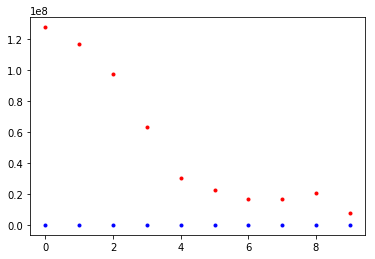

time:  38.2969


2631.0858379039755

In [9]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(1400, activation='relu'))
model.add(Dense(2800, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.4, 
                    epochs=10, 
                    batch_size=1000, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

* layer 14 / 1400 / 2800 / 1024 / 512 / 256 / 64 / 8 / 1 <b>[elu]</b>
* opt = adam,epoch = 10, batch = 1000

Train on 63000 samples, validate on 42000 samples
Epoch 1/10
63000/63000 [==============================] - 5s 73us/step - loss: 279256526.9841 - acc: 1.5873e-05 - val_loss: 183488059.8095 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 183488059.80952, saving model to ./model/01-183488059.8095.hdf5
Epoch 2/10
63000/63000 [==============================] - 3s 50us/step - loss: 117556937.7778 - acc: 6.3492e-05 - val_loss: 112702536.7619 - val_acc: 2.3810e-04

Epoch 00002: val_loss improved from 183488059.80952 to 112702536.76190, saving model to ./model/02-112702536.7619.hdf5
Epoch 3/10
63000/63000 [==============================] - 3s 50us/step - loss: 96184840.5714 - acc: 6.3492e-05 - val_loss: 86777783.7143 - val_acc: 1.6667e-04

Epoch 00003: val_loss improved from 112702536.76190 to 86777783.71429, saving model to ./model/03-86777783.7143.hdf5
Epoch 4/10
63000/63000 [==============================] - 3s 51us/step - loss: 71275022.6349 - acc: 1.1111e-04 - val_loss: 

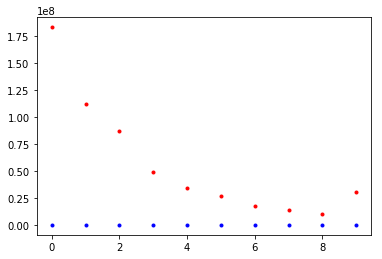

time:  38.7138


5320.6697344204795

In [10]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='elu'))
model.add(Dense(1400, activation='elu'))
model.add(Dense(2800, activation='elu'))
model.add(Dense(1024, activation='elu'))
model.add(Dense(512, activation='elu'))
model.add(Dense(256, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.4, 
                    epochs=10, 
                    batch_size=1000, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

* layer 14 / 1400 / 2800 / 1024 / 512 / 256 / 64 / 8 / 1 [relu]
* opt = adam,epoch = 10, batch = 100

Train on 63000 samples, validate on 42000 samples
Epoch 1/10
63000/63000 [==============================] - 18s 281us/step - loss: 110458482.6262 - acc: 1.1111e-04 - val_loss: 34680709.4833 - val_acc: 9.5238e-05

Epoch 00001: val_loss improved from inf to 34680709.48333, saving model to ./model/01-34680709.4833.hdf5
Epoch 2/10
63000/63000 [==============================] - 16s 259us/step - loss: 29272062.2472 - acc: 1.7460e-04 - val_loss: 10544496.1821 - val_acc: 2.8571e-04

Epoch 00002: val_loss improved from 34680709.48333 to 10544496.18214, saving model to ./model/02-10544496.1821.hdf5
Epoch 3/10
63000/63000 [==============================] - 16s 260us/step - loss: 15629968.8659 - acc: 2.8571e-04 - val_loss: 5704796.6432 - val_acc: 4.5238e-04

Epoch 00003: val_loss improved from 10544496.18214 to 5704796.64315, saving model to ./model/03-5704796.6432.hdf5
Epoch 4/10
63000/63000 [==============================] - 16s 259us/step - loss: 7582823.5295 - acc: 3.3333e-04 - val_loss: 60318

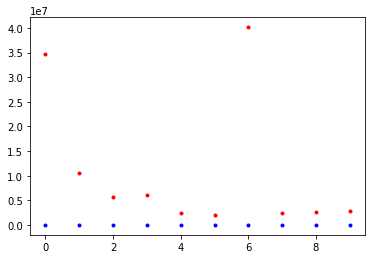

time:  168.6619


1695.9528980047269

In [11]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(1400, activation='relu'))
model.add(Dense(2800, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.4, 
                    epochs=10, 
                    batch_size=100, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

* layer 14 / 1400 / 2800 / 1024 / 512 / 256 / 64 / 8 / 1 [relu]
* opt = adam,epoch = 30, batch = 100

Train on 63000 samples, validate on 42000 samples
Epoch 1/30
63000/63000 [==============================] - 18s 288us/step - loss: 157693450.9540 - acc: 2.0635e-04 - val_loss: 59479186.8762 - val_acc: 1.1905e-04

Epoch 00001: val_loss improved from inf to 59479186.87619, saving model to ./model/01-59479186.8762.hdf5
Epoch 2/30
63000/63000 [==============================] - 16s 259us/step - loss: 32967883.6601 - acc: 2.3810e-04 - val_loss: 20516630.6077 - val_acc: 1.4286e-04

Epoch 00002: val_loss improved from 59479186.87619 to 20516630.60774, saving model to ./model/02-20516630.6077.hdf5
Epoch 3/30
63000/63000 [==============================] - 16s 257us/step - loss: 14428224.2524 - acc: 2.0635e-04 - val_loss: 6366573.8497 - val_acc: 2.3810e-04

Epoch 00003: val_loss improved from 20516630.60774 to 6366573.84970, saving model to ./model/03-6366573.8497.hdf5
Epoch 4/30
63000/63000 [==============================] - 16s 257us/step - loss: 6135541.5129 - acc: 4.1270e-04 - val_loss: 28355

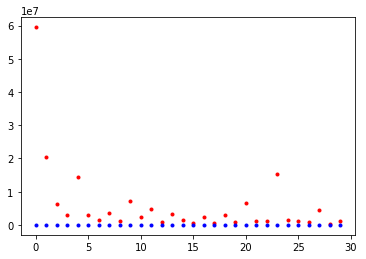

time:  495.934


1083.805479122983

In [12]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(1400, activation='relu'))
model.add(Dense(2800, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(x_train, y_train, 
                    validation_split=0.4, 
                    epochs=30, 
                    batch_size=100, 
                    callbacks=[checkpointer])


y_vloss = history.history['val_loss']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print('time: ', round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE